<a href="https://colab.research.google.com/github/clferreira1985/Python/blob/main/caso_pratico_regressao_logistica/caso_pratico_regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1º Problema de Negócio

Faremos previsão de diabetes em mulheres por meio da análise preditiva dos atributos de exames das pacientes

dataset retirado do kaggle

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
# import dos módulos
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Carregando os dados
arquivo = '/content/pima-data (1).csv'

colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [6]:
df = read_csv(arquivo, names = colunas)
array = df.values
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2º Análise Exploratória

In [7]:
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


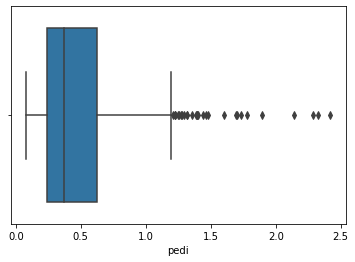

In [10]:
df.describe()
sns.boxplot(df.pedi)

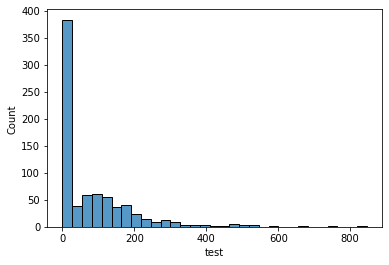

In [11]:
sns.histplot(df.test)

In [12]:
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## 3º Pré-Processamento dos Dados

In [13]:
# separando o array em componentes de input e output
x = array[:, 0:8]
y = array[:,8]


#### Normalização dos dados

In [29]:
# Gerando a nova escala (normalizando os dados)

scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler.fit_transform(x)   

In [30]:
rescaledx

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

#### Padronização

In [34]:
#Gerando o novo padrão
scaler = StandardScaler().fit(x)
standardx = scaler.transform(x)   

OBS.: Quem determina se será Normalização ou Padronização é o Cientista de dados

In [19]:
# Definindo os valores para o número de folds

num_folds = 10
seed = 7

# Separando os dados em folds

kfold = KFold(num_folds, shuffle = True, random_state = seed)

## 4º Criação da Máquina Preditiva

In [25]:
# Criando o modelo
modelo = LogisticRegression()

In [26]:
# Cross Validation
resultado = cross_val_score(modelo, x, y, cv = kfold)

In [33]:
# Com dados normalizados
resultado = cross_val_score(modelo, rescaledx, y, cv = kfold)

In [35]:
resultado = cross_val_score(modelo, standardx, y, cv = kfold)

## 5º avaliação da Máquina Preditiva 

In [37]:
# Print do resultado
print ('Acurácia: %.3f' % (resultado.mean() * 100))

# Sem normalizar ou padronizar os dados = 77,734
# normalizado                           = 77,479
# Padronizado                           = 77,346

Acurácia: 77.346


## Comparando com XGBoost

In [40]:
# Aproveitando os imports e o dados desse dataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [42]:
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste

x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size = teste_size, random_state=seed)

In [43]:
# Criando o modelo

modelo = XGBClassifier()

# Treinando o modelo

modelo.fit(x_treino, y_treino)

# pront do modelo
print(modelo)

# Fazendo previsões

y_pred = modelo.predict(x_teste)
previsoes = [round(value) for value in y_pred]

XGBClassifier()


### Avaliação da Maquina PreditivA

In [44]:
accuracy = accuracy_score(y_teste, previsoes)
print('Acurácia: %.2f%%' % (accuracy * 100.0))

Acurácia: 77.95%


OBS.: O XGBoost gerou uma previsão melhor